### My project-2 is the extension of project-1 i.e., Crime data analysis of Los Angeles from 2020 to present.

data source location: https://catalog.data.gov/dataset/crime-data-from-2020-to-present
Dataset: https://catalog.data.gov/dataset 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Scikit-learn is one of the machine learning tools that focuses on mathematical, statistical, and general-purpose algorithms. 
#These algorithms create the basis for many machine learning technologies.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import export_graphviz

In [2]:
# Load the crime data
data = pd.read_csv("C:\\Users\\aksha\\Downloads\\Crime_Data_from_2020_to_Present.csv (1)\\Crime_Data_from_2020_to_Present.csv")
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317849,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827
317850,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814
317851,211710505,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775
317852,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351


In [3]:
# Drop unnecessary columns
data.drop(['DR_NO', 'Date Rptd', 'Rpt Dist No' , 'Part 1-2', 'Mocodes', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LOCATION'], axis=1, inplace=True)
data.head() #print first 5 rows of data

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
0,01/08/2020 12:00:00 AM,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545
2,09/16/2020 12:00:00 AM,1230,12,77th Street,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,33.9739,-118.2630
3,01/01/2020 12:00:00 AM,1730,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,34.2198,-118.4468


In [4]:
# Check whether 'data' contains any Null values and drop them
print(data.isnull().sum())

data.dropna(axis=0, inplace=True) #drops the rows with missing values 
data.reset_index(drop=True, inplace=True) #it resets the data after dropping the missing values
data

DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
LAT                    0
LON                    0
dtype: int64


,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
0,01/08/2020 12:00:00 AM,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545
2,01/01/2020 12:00:00 AM,30,1,Central,121,"RAPE, FORCIBLE",25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534
3,09/12/2020 12:00:00 AM,30,18,Southeast,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,21,F,B,101.0,STREET,511.0,VERBAL THREAT,IC,Invest Cont,33.9019,-118.2916
4,01/04/2020 12:00:00 AM,2200,1,Central,330,BURGLARY FROM VEHICLE,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,34.0359,-118.2648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,03/05/2021 12:00:00 AM,915,2,Rampart,624,BATTERY - SIMPLE ASSAULT,54,F,H,101.0,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0593,-118.2750
116396,05/25/2021 12:00:00 AM,813,6,Hollywood,624,BATTERY - SIMPLE ASSAULT,33,M,B,135.0,MTA PROPERTY OR PARKING LOT,512.0,MACE/PEPPER SPRAY,IC,Invest Cont,34.1016,-118.3391
116397,07/04/2021 12:00:00 AM,2135,21,Topanga,624,BATTERY - SIMPLE ASSAULT,44,M,W,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.1855,-118.6296
116398,03/04/2021 12:00:00 AM,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,33.7424,-118.2814


In [5]:
# Split 'DATE OCC' into year, month and day.
data['DATE OCC'] = pd.to_datetime(data['DATE OCC']) #Convert 'DATE OCC' column to datetime format

#Create new columns for year, month, and day
data['YEAR OCC'] = data['DATE OCC'].dt.year
data['MONTH OCC'] = data['DATE OCC'].dt.month
data['DAY OCC'] = data['DATE OCC'].dt.day

data.drop('DATE OCC', axis=1, inplace=True) #Drop the original 'DATE OCC' column
data

,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,YEAR OCC,MONTH OCC,DAY OCC
0,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,2020,1,8
1,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,2020,1,1
2,30,1,Central,121,"RAPE, FORCIBLE",25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534,2020,1,1
3,30,18,Southeast,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,21,F,B,101.0,STREET,511.0,VERBAL THREAT,IC,Invest Cont,33.9019,-118.2916,2020,9,12
4,2200,1,Central,330,BURGLARY FROM VEHICLE,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,34.0359,-118.2648,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,915,2,Rampart,624,BATTERY - SIMPLE ASSAULT,54,F,H,101.0,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0593,-118.2750,2021,3,5
116396,813,6,Hollywood,624,BATTERY - SIMPLE ASSAULT,33,M,B,135.0,MTA PROPERTY OR PARKING LOT,512.0,MACE/PEPPER SPRAY,IC,Invest Cont,34.1016,-118.3391,2021,5,25
116397,2135,21,Topanga,624,BATTERY - SIMPLE ASSAULT,44,M,W,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.1855,-118.6296,2021,7,4
116398,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,33.7424,-118.2814,2021,3,4


In [6]:
# Relocate columns
data_desc = data[['Crm Cd Desc', 'Premis Desc', 'Weapon Desc', 'Status Desc']]
data = data[['YEAR OCC', 'MONTH OCC', 'DAY OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'Status']]
data

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status
0,2020,1,8,2230,3,Southwest,624,36,F,B,501.0,400.0,AO
1,2020,1,1,330,1,Central,624,25,M,H,102.0,500.0,IC
2,2020,1,1,30,1,Central,121,25,F,H,735.0,500.0,IC
3,2020,9,12,30,18,Southeast,930,21,F,B,101.0,511.0,IC
4,2020,1,4,2200,1,Central,330,29,M,A,101.0,306.0,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,2021,3,5,915,2,Rampart,624,54,F,H,101.0,500.0,IC
116396,2021,5,25,813,6,Hollywood,624,33,M,B,135.0,512.0,IC
116397,2021,7,4,2135,21,Topanga,624,44,M,W,101.0,400.0,IC
116398,2021,3,4,2210,5,Harbor,434,41,F,B,502.0,200.0,AA


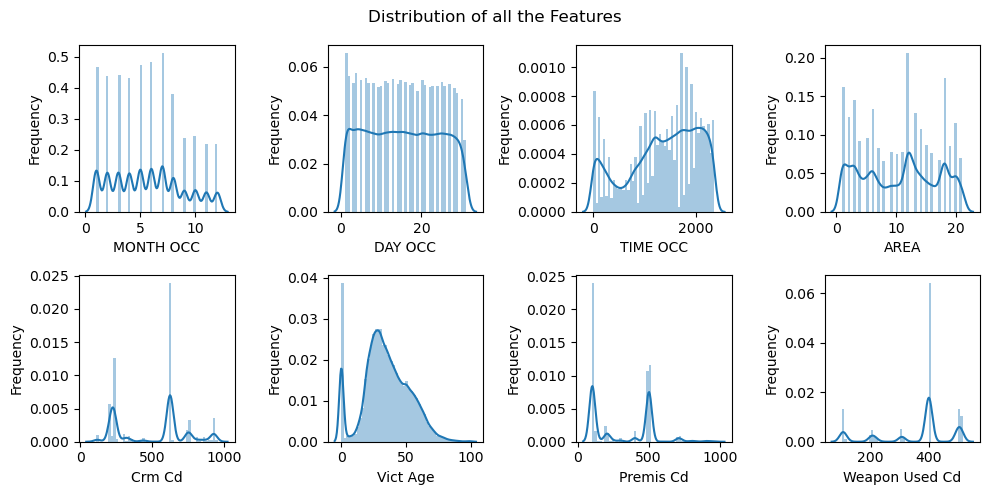

In [7]:
# Extract data for plotting distribution
data_distribution = data.iloc[:, [1, 2, 3, 4, 6, 7, 10, 11]] #iloc[rows,columns] #select the columns that we require
data_distribution

# Check distribution of each feature
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))

for i, feature in enumerate(data_distribution.columns):
    row = i // 4
    col = i % 4
    sns.distplot(data_distribution.iloc[:, i], ax=axs[row][col])
    axs[row][col].set_xlabel(feature)
    axs[row][col].set_ylabel('Frequency')

plt.suptitle('Distribution of all the Features')
plt.tight_layout()


In [8]:
# Remove rows where 'Vict Sex' is unknown[value is 0]
Vict_Sex_Unknown = data[data['Vict Sex'] == 'Unknown'].index
data.drop(Vict_Sex_Unknown, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status
0,2020,1,8,2230,3,Southwest,624,36,F,B,501.0,400.0,AO
1,2020,1,1,330,1,Central,624,25,M,H,102.0,500.0,IC
2,2020,1,1,30,1,Central,121,25,F,H,735.0,500.0,IC
3,2020,9,12,30,18,Southeast,930,21,F,B,101.0,511.0,IC
4,2020,1,4,2200,1,Central,330,29,M,A,101.0,306.0,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,2021,3,5,915,2,Rampart,624,54,F,H,101.0,500.0,IC
116396,2021,5,25,813,6,Hollywood,624,33,M,B,135.0,512.0,IC
116397,2021,7,4,2135,21,Topanga,624,44,M,W,101.0,400.0,IC
116398,2021,3,4,2210,5,Harbor,434,41,F,B,502.0,200.0,AA


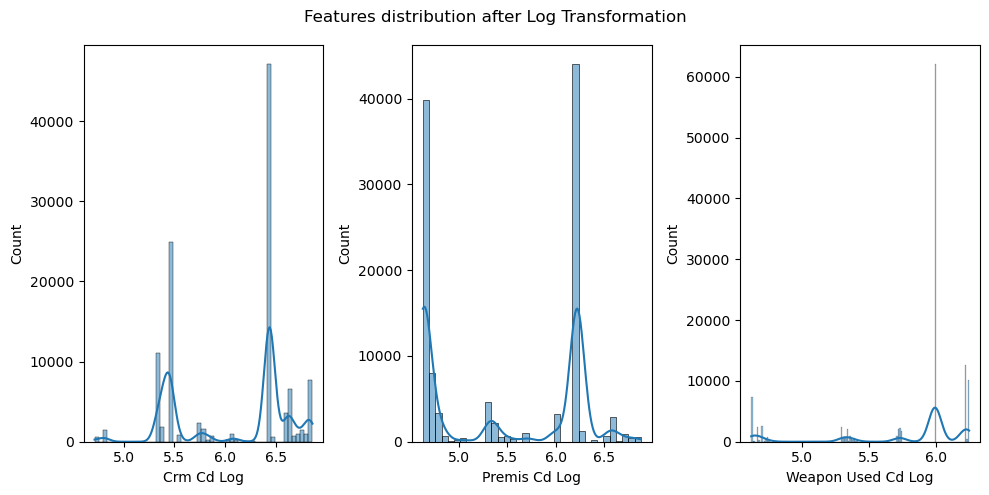

In [9]:
# Log Transformation- This is particularly helpful for numerical variables that have a large range of values and possibly skewed distributions.
if 'Crm Cd Log' not in data.columns:
    data.insert(7, 'Crm Cd Log', np.log1p(data['Crm Cd']))
if 'Premis Cd Log' not in data.columns:
    data.insert(12, 'Premis Cd Log', np.log1p(data['Premis Cd']))
if 'Weapon Used Cd Log' not in data.columns:
    data.insert(14, 'Weapon Used Cd Log', np.log1p(data['Weapon Used Cd']))
    
# Check distribution of columns log transformation processed
data_distribution_log = data[['Crm Cd Log', 'Premis Cd Log', 'Weapon Used Cd Log']]
data_distribution_log

fig, axs = plt.subplots(ncols=3, figsize=(10, 5))

for i, feature in enumerate(data_distribution_log.columns):
    col = i % 3
    sns.histplot(data_distribution_log.iloc[:, i], ax=axs[col], kde=True)
    axs[col].set_xlabel(feature)

plt.suptitle('Features distribution after Log Transformation')
plt.tight_layout()


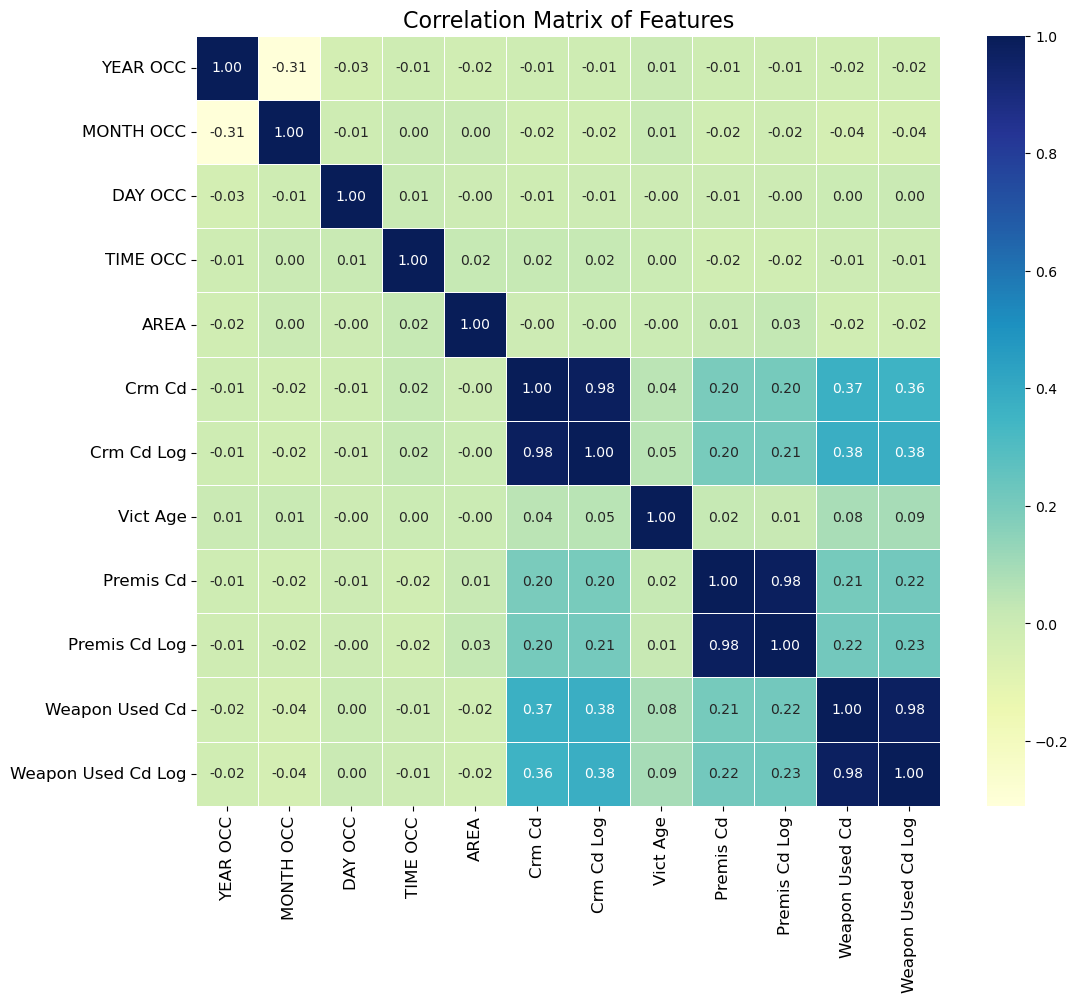

In [10]:
#VISUALIZATION 
#visualizes the correlation of features using a heatmap and scales the features using MinMaxScaler to prepare for the heatmap.

plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix of Features', fontsize=16)
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap="YlGnBu")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [11]:
# Process MinMaxScaling in order to make heatmap
data_scaled = data.copy()
except_features = ['MONTH OCC', 'AREA NAME', 'Vict Sex', 'Vict Descent', 'Status'] 
#features in the dataset will not be scaled

features = data.drop(except_features, axis=1, inplace=False).columns
scaler = MinMaxScaler()

for feature in features:
    data_scaled[feature] = scaler.fit_transform(data_scaled[feature].values.reshape(-1, 1))

data_scaled

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Log,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log,Status
0,0.0,1,0.233333,0.945293,0.10,Southwest,0.607565,0.802229,0.363636,F,B,0.459770,0.706902,0.720482,0.843456,AO
1,0.0,1,0.000000,0.139525,0.00,Central,0.607565,0.802229,0.252525,M,H,0.001149,0.004328,0.961446,0.980631,IC
2,0.0,1,0.000000,0.012299,0.00,Central,0.013002,0.043862,0.252525,F,H,0.728736,0.876629,0.961446,0.980631,IC
3,0.0,9,0.366667,0.012299,0.85,Southeast,0.969267,0.987214,0.212121,F,B,0.000000,0.000000,0.987952,0.994012,IC
4,0.0,1,0.100000,0.932570,0.00,Central,0.260047,0.507173,0.292929,M,A,0.000000,0.000000,0.493976,0.678883,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,1.0,3,0.133333,0.387617,0.05,Rampart,0.607565,0.802229,0.545455,F,H,0.000000,0.000000,0.961446,0.980631,IC
116396,1.0,5,0.800000,0.344360,0.25,Hollywood,0.607565,0.802229,0.333333,M,B,0.039080,0.127610,0.990361,0.995215,IC
116397,1.0,7,0.100000,0.905004,1.00,Topanga,0.607565,0.802229,0.444444,M,W,0.000000,0.000000,0.720482,0.843456,IC
116398,1.0,3,0.100000,0.936811,0.20,Harbor,0.382979,0.634003,0.414141,F,B,0.460920,0.707785,0.238554,0.417931,AA


In [12]:
# Create a DataFrame with scaled features and group by 'MONTH OCC'
data_month = data_scaled.groupby('MONTH OCC').agg('mean').drop('YEAR OCC', axis=1)
data_month

,DAY OCC,TIME OCC,AREA,Crm Cd,Crm Cd Log,Vict Age,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log
MONTH OCC,,,,,,,,,,
1,0.492548,0.570013,0.475891,0.476360,0.647975,0.346025,0.246132,0.379313,0.636532,0.732049
2,0.462798,0.576926,0.474054,0.481528,0.652346,0.344587,0.246014,0.377158,0.650001,0.746045
3,0.489018,0.582478,0.476805,0.476940,0.649114,0.345575,0.251691,0.386948,0.643014,0.740651
4,0.490122,0.580725,0.480907,0.469616,0.641752,0.354669,0.244836,0.378987,0.634336,0.731751
5,0.508899,0.576370,0.475585,0.467046,0.640505,0.346220,0.237060,0.367862,0.633769,0.732184
6,0.488199,0.576093,0.487068,0.470682,0.642271,0.354249,0.234011,0.363400,0.627465,0.725002
7,0.489655,0.570781,0.477739,0.467032,0.639693,0.358364,0.232815,0.361454,0.630128,0.727820
8,0.416773,0.565691,0.475559,0.472397,0.644711,0.352532,0.236363,0.363780,0.622468,0.720553
9,0.483511,0.580488,0.481764,0.471065,0.641860,0.357483,0.235415,0.364969,0.620466,0.716327


<AxesSubplot:title={'center':'Correlation of the data by Month'}, ylabel='MONTH OCC'>

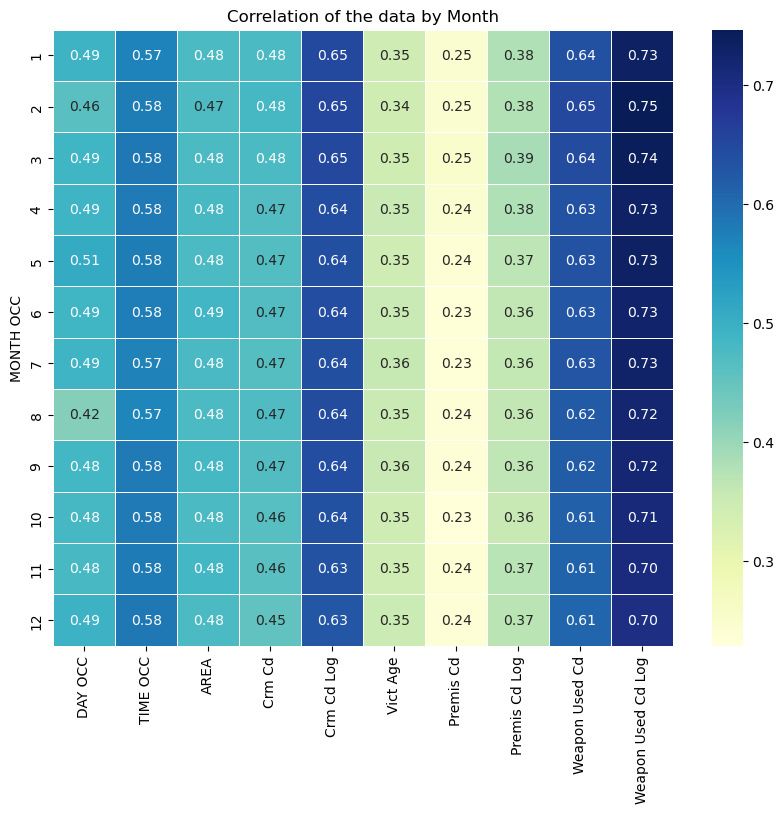

In [13]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of the data by Month')
sns.heatmap(data_month, annot=True, fmt='.2f', linewidths=.5, cmap="YlGnBu")

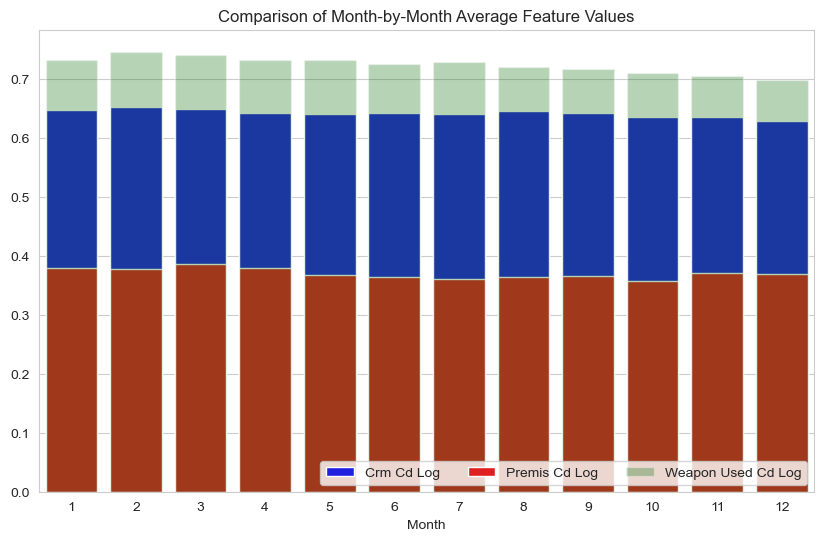

In [14]:
# Plot barplot
data_month = data_scaled.groupby(by='MONTH OCC', as_index=False).mean()
data_month.drop(['YEAR OCC'], axis=1, inplace=True)

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(10, 6))

#Plot 'Crm Cd Log'
sns.set_color_codes("pastel")
sns.barplot(x="MONTH OCC", y="Crm Cd Log", data=data_month, label="Crm Cd Log", color="blue")

#Plot 'Premis Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="MONTH OCC", y="Premis Cd Log", data=data_month, label="Premis Cd Log", color="red")

#Plot 'Weapon Used Cd Log'
sns.set_color_codes("dark")
sns.barplot(x="MONTH OCC", y="Weapon Used Cd Log", data=data_month, label="Weapon Used Cd Log", color="green", alpha=0.3)

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Month")
plt.title("Comparison of Month-by-Month Average Feature Values")
plt.show()

In [15]:
## perform MinMaxScaling on the data for heatmap
data_scaled = data.copy()
except_features = ['DAY OCC', 'AREA NAME', 'Vict Sex', 'Vict Descent', 'Status']
#features in the dataset will not be scaled
scaler = MinMaxScaler()
data_scaled[data.drop(except_features, axis=1, inplace=False).columns] = scaler.fit_transform(data_scaled[data.drop(except_features, axis=1, inplace=False).columns])

features = np.array(data.drop(except_features, axis=1, inplace=False).columns).reshape(-1, 1)

In [16]:
data_day = data_scaled.groupby('DAY OCC').agg('mean').drop('YEAR OCC', axis=1)
data_day

,MONTH OCC,TIME OCC,AREA,Crm Cd,Crm Cd Log,Vict Age,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log
DAY OCC,,,,,,,,,,
1,0.417192,0.529997,0.489594,0.480901,0.646700,0.332777,0.260564,0.401650,0.633834,0.732153
2,0.432583,0.579579,0.482112,0.468090,0.641714,0.352362,0.234765,0.362964,0.620445,0.717115
3,0.438854,0.581977,0.479757,0.475103,0.646211,0.355535,0.241423,0.375070,0.635730,0.731261
4,0.433611,0.585793,0.473406,0.478443,0.651027,0.353855,0.235824,0.363134,0.625175,0.721006
5,0.436326,0.578476,0.479152,0.462532,0.633844,0.351959,0.236579,0.365321,0.627024,0.721555
6,0.432961,0.584650,0.469462,0.464334,0.637894,0.352938,0.236236,0.364163,0.625616,0.722549
7,0.436081,0.577420,0.477348,0.469981,0.643077,0.356129,0.240285,0.368887,0.632909,0.729515
8,0.432826,0.577076,0.476082,0.475935,0.647992,0.351056,0.240273,0.371125,0.637700,0.734493
9,0.436118,0.581454,0.484993,0.472391,0.644725,0.355096,0.237698,0.366255,0.630054,0.726021


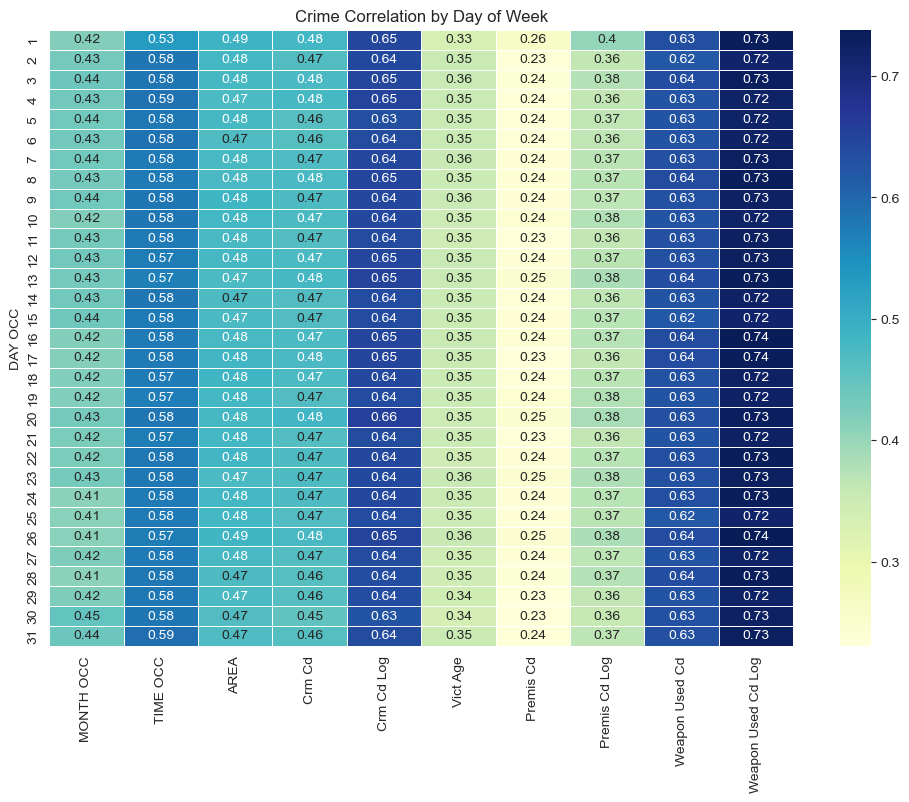

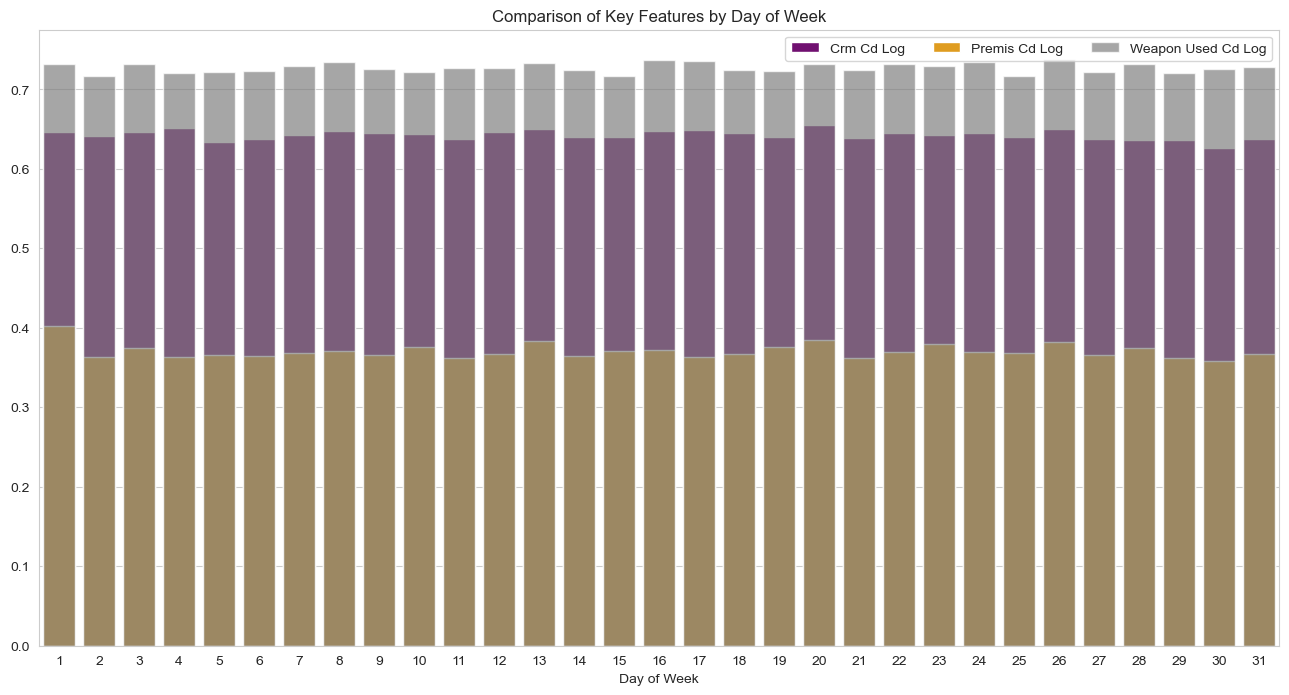

In [17]:
# Plot heatmap
plt.figure(figsize=(12, 8))
plt.title('Crime Correlation by Day of Week')
sns.heatmap(data_day, annot=True, linewidths=.5, cmap="YlGnBu")

# Plot barplot
data_day_bar = data_scaled.groupby(by='DAY OCC', as_index=False).mean().drop(['YEAR OCC'], axis=1)

sns.set_theme="whitegrid"
f, ax = plt.subplots(figsize=(16, 8))

## Plot 'Crm Cd Log'
sns.set_color_codes("pastel")
sns.barplot(x="DAY OCC", y="Crm Cd Log", data=data_day_bar, label="Crm Cd Log", color="purple")

## Plot 'Premis Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="DAY OCC", y="Premis Cd Log", data=data_day_bar, label="Premis Cd Log", color="orange")

## Plot 'Weapon Used Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="DAY OCC", y="Weapon Used Cd Log", data=data_day_bar, label="Weapon Used Cd Log", color="grey", alpha=0.7)

ax.legend(ncol=3, loc="upper right", frameon=True)
ax.set(ylabel="", xlabel="Day of Week")
plt.title("Comparison of Key Features by Day of Week")

plt.show()

In [18]:
#splitting datasets
data_train = data.drop(['AREA NAME', 'Vict Descent', 'Status'], axis=1)  # drops unnecessary columns
data_train = pd.get_dummies(data_train) #create dummy variables
data_train

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,Crm Cd,Crm Cd Log,Vict Age,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X
0,2020,1,8,2230,3,624,6.437752,36,501.0,6.218600,400.0,5.993961,1,0,0,0
1,2020,1,1,330,1,624,6.437752,25,102.0,4.634729,500.0,6.216606,0,0,1,0
2,2020,1,1,30,1,121,4.804021,25,735.0,6.601230,500.0,6.216606,1,0,0,0
3,2020,9,12,30,18,930,6.836259,21,101.0,4.624973,511.0,6.238325,1,0,0,0
4,2020,1,4,2200,1,330,5.802118,29,101.0,4.624973,306.0,5.726848,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,2021,3,5,915,2,624,6.437752,54,101.0,4.624973,500.0,6.216606,1,0,0,0
116396,2021,5,25,813,6,624,6.437752,33,135.0,4.912655,512.0,6.240276,0,0,1,0
116397,2021,7,4,2135,21,624,6.437752,44,101.0,4.624973,400.0,5.993961,0,0,1,0
116398,2021,3,4,2210,5,434,6.075346,41,502.0,6.220590,200.0,5.303305,1,0,0,0


In [19]:
# MinMax Scaling of DataFrame
scaler = MinMaxScaler()
data_train_scaled = pd.DataFrame(scaler.fit_transform(data_train), columns=data_train.columns)
data_train_scaled

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,Crm Cd,Crm Cd Log,Vict Age,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X
0,0.0,0.000000,0.233333,0.945293,0.10,0.607565,0.802229,0.363636,0.459770,0.706902,0.720482,0.843456,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.139525,0.00,0.607565,0.802229,0.252525,0.001149,0.004328,0.961446,0.980631,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.000000,0.012299,0.00,0.013002,0.043862,0.252525,0.728736,0.876629,0.961446,0.980631,1.0,0.0,0.0,0.0
3,0.0,0.727273,0.366667,0.012299,0.85,0.969267,0.987214,0.212121,0.000000,0.000000,0.987952,0.994012,1.0,0.0,0.0,0.0
4,0.0,0.000000,0.100000,0.932570,0.00,0.260047,0.507173,0.292929,0.000000,0.000000,0.493976,0.678883,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,1.0,0.181818,0.133333,0.387617,0.05,0.607565,0.802229,0.545455,0.000000,0.000000,0.961446,0.980631,1.0,0.0,0.0,0.0
116396,1.0,0.363636,0.800000,0.344360,0.25,0.607565,0.802229,0.333333,0.039080,0.127610,0.990361,0.995215,0.0,0.0,1.0,0.0
116397,1.0,0.545455,0.100000,0.905004,1.00,0.607565,0.802229,0.444444,0.000000,0.000000,0.720482,0.843456,0.0,0.0,1.0,0.0
116398,1.0,0.181818,0.100000,0.936811,0.20,0.382979,0.634003,0.414141,0.460920,0.707785,0.238554,0.417931,1.0,0.0,0.0,0.0


In [20]:
train_features = data_train_scaled.drop(['Crm Cd Log'], axis=1)
train_label = data_train_scaled['Crm Cd Log']  #label for the training

In [21]:
# Split datasets
X = data[['YEAR OCC', 'MONTH OCC', 'DAY OCC', 'TIME OCC', 'AREA', 'Vict Age', 'Premis Cd Log', 'Weapon Used Cd Log']]
X = pd.get_dummies(X, columns=['AREA'])
y = data['Crm Cd Log'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (93120, 28)
Shape of X_test:  (23280, 28)
Shape of y_train:  (93120,)
Shape of y_test:  (23280,)


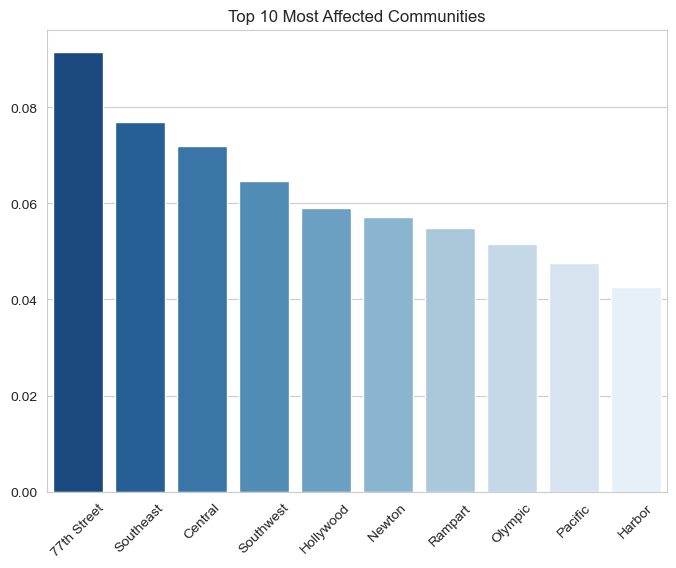

Based on the data analysis, the community that is most affected by crime is 77th Street .


In [223]:
# Analyzing crime by community
community_counts = data['AREA NAME'].value_counts(normalize=True)
top_communities = community_counts.head(10)

# Creating a bar chart of the top 10 most affected communities
plt.figure(figsize=(8,6))
sns.barplot(x=top_communities.index, y=top_communities.values, palette='Blues_r')
plt.title('Top 10 Most Affected Communities')
plt.xticks(rotation=45)
plt.show()

# Printing out the most affected community
print("Based on the data analysis, the community that is most affected by crime is", top_communities.index[0], ".")

##### Hypothesis-1: With the start of the COVID-19 epidemic, crime rates in Los Angeles have risen as a result of issues like economic hardship, social discontent, and a lack of law enforcement resources.
I will use crime statistics for Los Angeles from March 2020 to the present to evaluate this theory. I will study potential connections between crime rates and economic indicators, social unrest events, and the distribution of law enforcement resources using statistical methods to discover any noteworthy changes in crime rates over time. The results of this investigation will help identify any trends and will also shed light on how the epidemic has affected crime in Los Angeles.

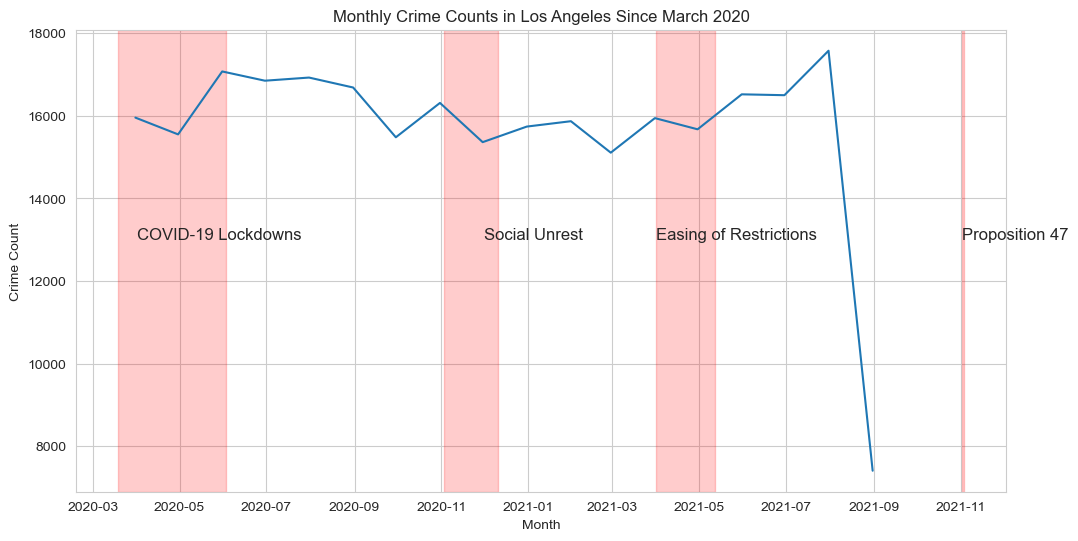

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num

# Load crime data for Los Angeles from 2020 to present
crime_df = pd.read_csv("C:\\Users\\aksha\\Downloads\\Crime_Data_from_2020_to_Present.csv (1)\\Crime_Data_from_2020_to_Present.csv")

# Convert 'Date Occurred' column to datetime format
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Filter data to only include dates after March 2020
crime_df = crime_df[crime_df['DATE OCC'] >= '2020-03-01']

# Group data by date and count number of crimes per month
monthly_crime_counts = crime_df.groupby(pd.Grouper(key='DATE OCC', freq='M'))['DR_NO'].count()

# Plot monthly crime counts
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_crime_counts, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Crime Count')
ax.set_title('Monthly Crime Counts in Los Angeles Since March 2020')

# Convert important event dates to matplotlib dates
covid_lockdowns = date2num(pd.to_datetime('2020-04-01'))
social_unrest = date2num(pd.to_datetime('2020-12-01'))
easing_of_restrictions = date2num(pd.to_datetime('2021-04-01'))
prop_47 = date2num(pd.to_datetime('2021-11-02'))

# Add shaded regions to indicate important events
ax.axvspan(date2num(pd.to_datetime('2020-03-19')), date2num(pd.to_datetime('2020-06-03')), alpha=0.2, color='red')
ax.axvspan(date2num(pd.to_datetime('2020-11-03')), date2num(pd.to_datetime('2020-12-11')), alpha=0.2, color='red')
ax.axvspan(easing_of_restrictions, date2num(pd.to_datetime('2021-05-12')), alpha=0.2, color='red')
ax.axvspan(prop_47, date2num(pd.to_datetime('2021-11-03')), alpha=0.2, color='red')

# Add labels for important events
ax.text(covid_lockdowns, 13000, 'COVID-19 Lockdowns', fontsize=12)
ax.text(social_unrest, 13000, 'Social Unrest', fontsize=12)
ax.text(easing_of_restrictions, 13000, 'Easing of Restrictions', fontsize=12)
ax.text(prop_47, 13000, 'Proposition 47', fontsize=12)

plt.show()

This code first loads in crime data for Los Angeles from a CSV file and filters it to only include dates after March 2020, which is when the COVID-19 pandemic began to significantly impact daily life in the United States. It then calculates monthly crime counts using the resample method of the Pandas DataFrame, which aggregates data by a given time period (in this case, months).

Next, the code plots the monthly crime counts on a line graph, with the x-axis showing the month and the y-axis showing the number of crimes. It also adds shaded regions to the graph to indicate important events that may have had an impact on crime rates, such as COVID-19 lockdowns, social unrest, and changes to law enforcement policies.

This visualization could be used to test the hypothesis that crime rates in Los Angeles have increased since the beginning of the COVID-19 pandemic. If the graph shows a significant increase in crime rates following the start of the pandemic, and if there are noticeable spikes or dips in crime rates coinciding with important events like lockdowns or social unrest, that would provide evidence to support this hypothesis.

##### Hypothesis 2: There are certain neighborhoods in Los Angeles that are more prone to certain types of crimes than others. 

The goal of this study is to examine crime trends in various Los Angeles neighborhoods and determine whether any certain areas are more likely than others to experience particular sorts of crimes. This research can contribute to the creation of more effective crime prevention methods and eventually enhance the safety and well-being of residents in Los Angeles by offering insights and recommendations to city leaders and law enforcement organizations.

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
crime_df = pd.read_csv("C:/Users/aksha/Downloads/Crime_Data_from_2020_to_Present.csv (1)/Crime_Data_from_2020_to_Present.csv").head(100)

# Check for missing values in the dataset
print('Missing values in dataset:', crime_df.isnull().sum())

Missing values in dataset: DR_NO               0
Date Rptd           0
DATE OCC            0
TIME OCC            0
AREA                0
AREA NAME           0
Rpt Dist No         0
Part 1-2            0
Crm Cd              0
Crm Cd Desc         0
Mocodes             8
Vict Age            0
Vict Sex            8
Vict Descent        8
Premis Cd           0
Premis Desc         0
Weapon Used Cd     55
Weapon Desc        55
Status              0
Status Desc         0
Crm Cd 1            0
Crm Cd 2           85
Crm Cd 3          100
Crm Cd 4          100
LOCATION            0
Cross Street       73
LAT                 0
LON                 0
dtype: int64


In [24]:
# Create a new DataFrame with crime counts by neighborhood and crime type
crime_counts_df = pd.pivot_table(crime_df, values='DR_NO', index='AREA NAME', columns='Crm Cd Desc', aggfunc='count', fill_value=0)

In [25]:
# Compute the total number of crimes by neighborhood
crime_counts_df['Total'] = crime_counts_df.sum(axis=1)


In [26]:
# Sort the neighborhoods by total crime count
crime_counts_df = crime_counts_df.sort_values(by='Total', ascending=False)


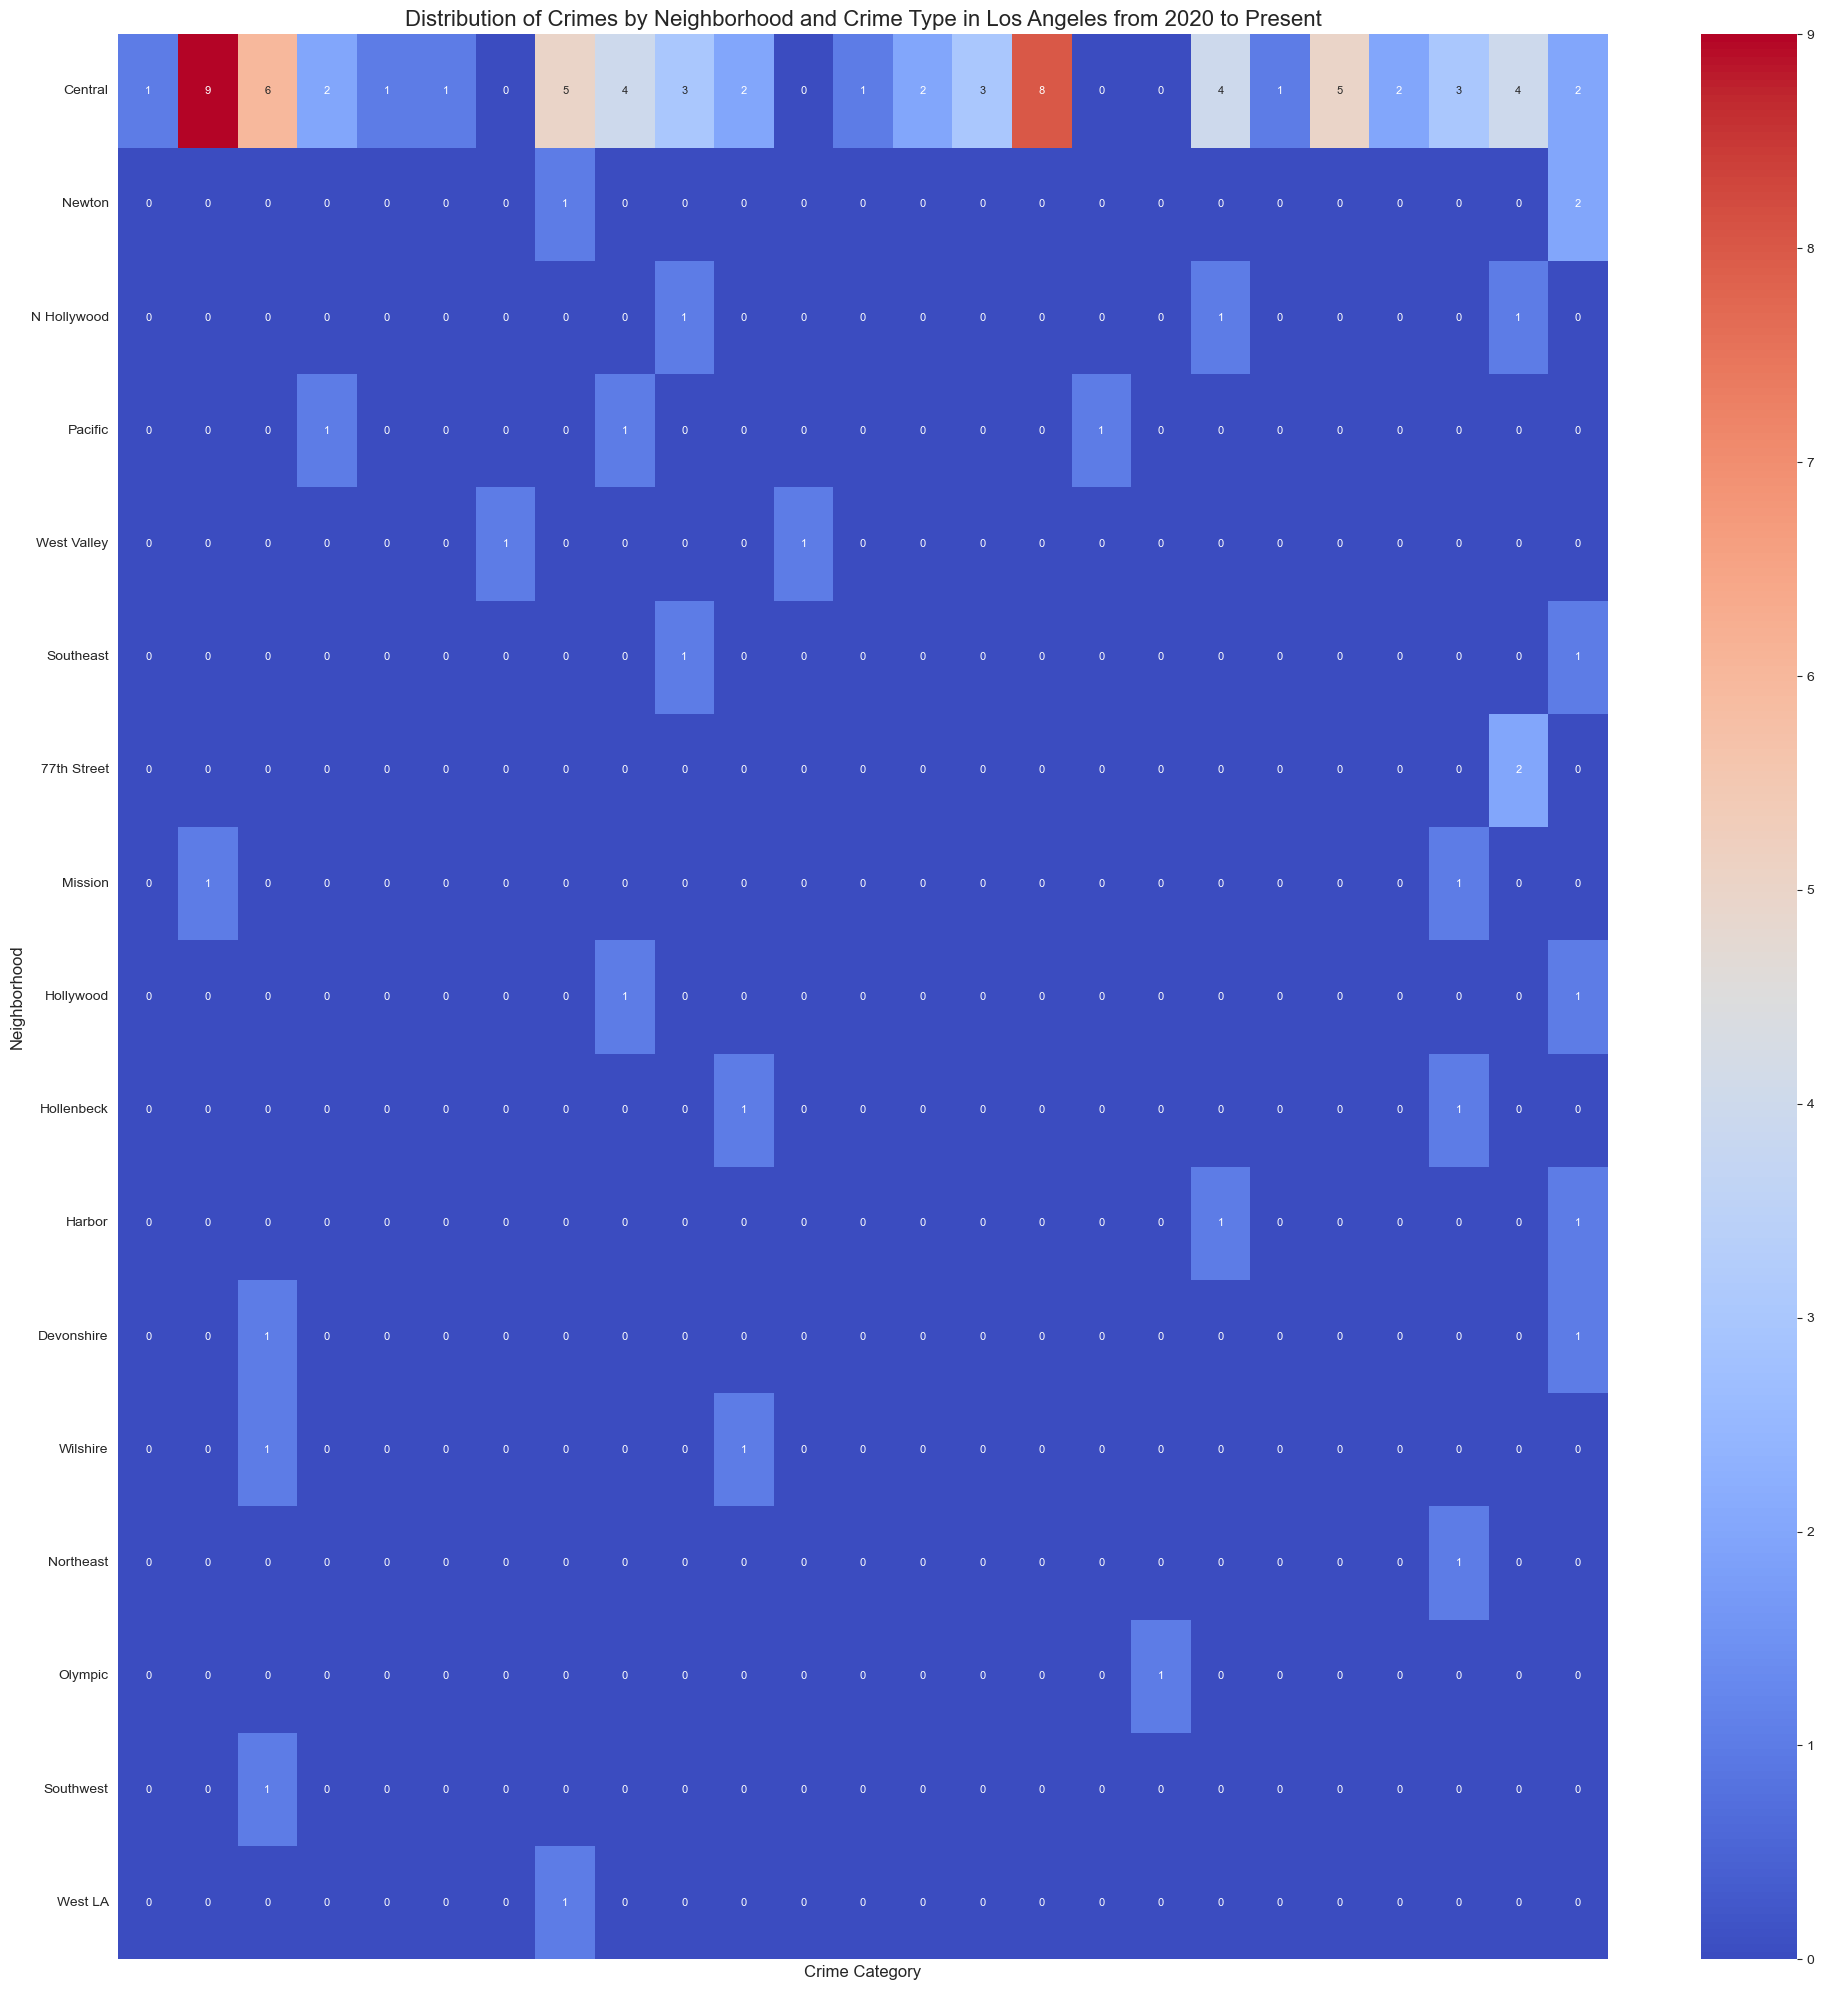

In [27]:
# Visualize the distribution of crimes by neighborhood and crime type
plt.figure(figsize=(20, 20))
sns.heatmap(crime_counts_df.iloc[:, :-1], cmap='coolwarm', annot=True, fmt='d', annot_kws={"size": 8})
plt.title('Distribution of Crimes by Neighborhood and Crime Type in Los Angeles from 2020 to Present', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tight_layout()
plt.show()

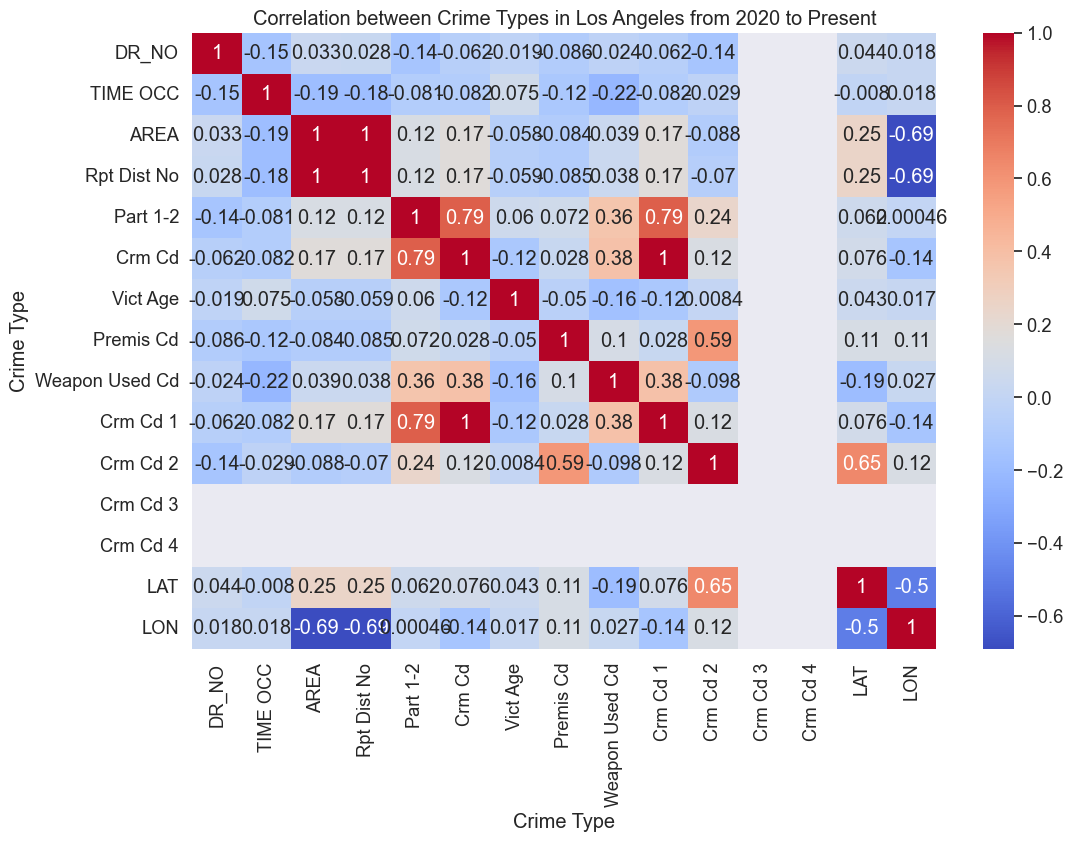

In [46]:
# Set figure size and font scale
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
# Compute correlation between crime types
crime_type_corr = crime_df.corr()

# Create heatmap with annotations
heatmap = sns.heatmap(crime_type_corr, annot=True, cmap='coolwarm')

# Set title and axis labels
heatmap.set_title('Correlation between Crime Types in Los Angeles from 2020 to Present')
heatmap.set_xlabel('Crime Type')
heatmap.set_ylabel('Crime Type')

# Show plot
plt.show()


By analyzing crime data and visualizing crime trends by neighborhood and crime type, the code provides insights into which neighborhoods are more likely to experience certain types of crimes.

The pivot table created in the code counts the number of crimes by neighborhood and crime type, which helps to identify which neighborhoods experience the highest frequency of specific types of crimes. Additionally, the heatmap visualization provides a clear and concise way to see which neighborhoods have higher or lower rates of different types of crimes.

By analyzing the trends in crime patterns by neighborhood, this hypothesis can be tested and validated, which can help to inform the development of more effective crime prevention methods and policies in Los Angeles. The insights and recommendations provided by this analysis can be useful for city leaders and law enforcement organizations to enhance the safety and well-being of residents in Los Angeles.